In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Leer datos del DataSet 📅

In [2]:
initial_data = pd.read_csv("Bank_Clean.csv")

In [3]:
initial_data.head()

,age,job,marital,default,balance,loan,duration,campaign,previous,deposit
0,59,0,1,0,2343,0,1042,1,0,1
1,56,0,1,0,45,0,1467,1,0,1
2,41,9,1,0,1270,0,1389,1,0,1
3,55,7,1,0,2476,0,579,1,0,1
4,54,0,1,0,184,0,673,2,0,1


## Creación, entrenamiento y testeo del modelo 🤖

In [4]:
hidden_layer_1 = tf.keras.layers.Dense(units=10, input_shape=[9], activation='sigmoid')
hidden_layer_2 = tf.keras.layers.Dense(units=10, activation='tanh')
hidden_layer_3 = tf.keras.layers.Dense(units=10, activation='tanh')
exit_layer = tf.keras.layers.Dense(units=5, activation='sigmoid')
model = tf.keras.Sequential([hidden_layer_1, hidden_layer_2, hidden_layer_3, exit_layer])

model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['binary_accuracy']) 
# -> "mean_squared_error": Poca cantidad de errores grandes es peor que una grande cantidad de errores pequeños

train_data, target_data = initial_data.iloc[:, :-1], initial_data["deposit"]
history = model.fit(train_data, target_data, epochs=100, verbose=False)

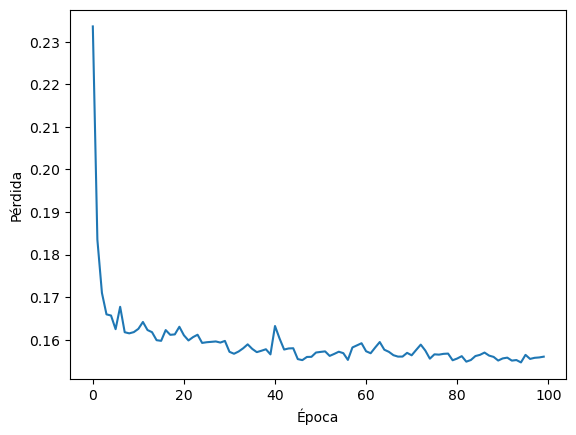

In [5]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.plot(history.history["loss"])
plt.show()

In [6]:
model.evaluate(train_data, target_data)

225/225 [==============================] - 0s 634us/step - loss: 0.1576 - binary_accuracy: 0.7768


[0.1575656682252884, 0.7768234014511108]

In [7]:
result = model.predict([[22, 0, 1, 0, 1500, 1, 1200, 1, 1]])

1/1 [==============================] - 0s 79ms/step


In [8]:
print("Se Suscribiría: 1 || No se Suscribiría: 0")
print("La predicción es:", (int(result[0][0])))

Se Suscribiría: 1 || No se Suscribiría: 0
La predicción es: 0
